In [2]:
-- CREATE TABLE apartment_education_summary AS
-- WITH education_summary AS (
--     SELECT
--         Zip_Code_String,
--         (18_to_24_High_school_graduate + 25_and_over_High_school_graduate7) AS Total_High_school_graduate,
--         (18_to_24_Some_college_or_associates_degree + 25_and_over_Some_college_no_degree8 + 25_and_over_Associates_degree9) AS Total_Associates_degree,
--         (18_to_24_Bachelors_degree_or_higher + 25_and_over_Bachelors_degree10) AS Total_Bachelors_degree,
--         25_and_over_Graduate_or_professional_degree11 AS Total_Graduate_degree
--     FROM education_by_age_zip_code
-- ),

-- population_data AS (
--     SELECT
--         zip,
--         CAST(REPLACE(population, '"', '') AS INT) AS Population
--     FROM zip_population
-- )


-- SELECT
--     a.SanitizedName,
--     a.Zip,
--     e.Total_High_school_graduate,
--     e.Total_Associates_degree,
--     e.Total_Bachelors_degree,
--     e.Total_Graduate_degree,
--     (e.Total_High_school_graduate / p.Population) * 100 AS Percentage_High_school_graduate,
--     (e.Total_Associates_degree / p.Population) * 100 AS Percentage_Associates_degree,
--     (e.Total_Bachelors_degree / p.Population) * 100 AS Percentage_Bachelors_degree,
--     (e.Total_Graduate_degree / p.Population) * 100 AS Percentage_Graduate_degree


-- FROM SAN_ApartmentNameRef a
-- LEFT JOIN education_summary e ON a.Zip = e.Zip_Code_String
-- LEFT JOIN population_data p ON a.Zip = p.zip;

-- CREATE TABLE apartment_disbursement_summary AS
-- WITH disbursement_summary AS (
--     SELECT
--         ProductsId,
--         SUM(CASE WHEN DisbursementStatusName = 'Complete' THEN 1 ELSE 0 END) AS Completed,
--         SUM(CASE WHEN DisbursementStatusName = 'Expired' THEN 1 ELSE 0 END) AS Expired,
--         COUNT(*) AS Total
--     FROM df_SAN_Disbursements
--     GROUP BY ProductsId
-- ),
-- percentage_summary AS (
--     SELECT
--         ProductsId,
--         (Completed / Total) * 100 AS Percentage_Completed,
--         (Expired / Total) * 100 AS Percentage_Expired
--     FROM disbursement_summary
-- )
-- SELECT
--     a.SanitizedName,
--     a.Zip,
--     p.Percentage_Completed,
--     p.Percentage_Expired
-- FROM SAN_ApartmentNameRef a
-- LEFT JOIN percentage_summary p ON a.ProductId = p.ProductsId
-- ORDER BY a.Zip;
-- CREATE TABLE apartment_feedback AS
-- SELECT a.SanitizedName,
--        a.Zip,
--        AVG(f.Stars) AS AverageFeedback
-- FROM df_SAN_Recipient_Feedback f
-- JOIN df_SAN_RecipientPayments r ON f.RecipientsId = r.RecipientsId
-- JOIN df_SAN_Disbursements d ON r.DisbursementsId = d.DisbursementsId
-- JOIN SAN_ApartmentNameRef a ON d.ProductsId = a.ProductId
-- GROUP BY a.SanitizedName,
--          a.Zip
-- ORDER BY 
-- a.Zip

-- CREATE TABLE apartment_PartyType AS
-- SELECT a.SanitizedName,
--        a.Zip,
--        SUM(CASE WHEN d.DisbursementPartyType = 'Multi-Party' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS MultiPartyPercentage,
--        SUM(CASE WHEN d.DisbursementPartyType = 'Single-Party' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS SinglePartyPercentage
-- FROM df_SAN_Disbursements d
-- JOIN SAN_ApartmentNameRef a ON d.ProductsId = a.ProductId
-- GROUP BY a.SanitizedName,
--          a.Zip
-- ORDER BY 
--   a.Zip

-- CREATE TABLE apartment_disbursement_summary_zip AS
-- WITH disbursement_summary AS (
--     SELECT
--         ProductsId,
--         SUM(CASE WHEN DisbursementStatusName = 'Complete' THEN 1 ELSE 0 END) AS Completed,
--         SUM(CASE WHEN DisbursementStatusName = 'Expired' THEN 1 ELSE 0 END) AS Expired,
--         COUNT(*) AS Total
--     FROM df_SAN_Disbursements
--     GROUP BY ProductsId
-- ),
-- percentage_summary AS (
--     SELECT
--         ProductsId,
--         (Completed / Total) * 100 AS Percentage_Completed,
--         (Expired / Total) * 100 AS Percentage_Expired
--     FROM disbursement_summary
-- )
-- SELECT
--     a.Zip,
--     p.Percentage_Completed,
--     p.Percentage_Expired
-- FROM SAN_ApartmentNameRef a
-- LEFT JOIN percentage_summary p ON a.ProductId = p.ProductsId
-- ORDER BY a.Zip;

-- CREATE TABLE apartment_feedback_zip AS
-- SELECT a.Zip,
--        AVG(f.Stars) AS AverageFeedback
-- FROM df_SAN_Recipient_Feedback f
-- JOIN df_SAN_RecipientPayments r ON f.RecipientsId = r.RecipientsId
-- JOIN df_SAN_Disbursements d ON r.DisbursementsId = d.DisbursementsId
-- JOIN SAN_ApartmentNameRef a ON d.ProductsId = a.ProductId
-- GROUP BY a.Zip
-- ORDER BY a.Zip

CREATE TABLE apartment_PartyType_zip AS
SELECT a.Zip,
       SUM(CASE WHEN d.DisbursementPartyType = 'Multi-Party' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS MultiPartyPercentage,
       SUM(CASE WHEN d.DisbursementPartyType = 'Single-Party' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS SinglePartyPercentage
FROM df_SAN_Disbursements d
JOIN SAN_ApartmentNameRef a ON d.ProductsId = a.ProductId
GROUP BY a.Zip
ORDER BY a.Zip;










StatementMeta(, 34265a85-cd48-4510-98f6-a2d10ef41fd2, 3, Finished, Available, Finished)

<Spark SQL result set with 0 rows and 0 fields>

In [10]:
%%sql
-- SELECT 
--     SAN_ApartmentNameRef.SanitizedName,
--     SAN_ApartmentNameRef.Zip,
--     all_us_zip_codes.states_initials,
--     all_us_zip_codes.city, 
--     all_us_zip_codes.county, 
--     zip_population.population
-- FROM 
--     SAN_ApartmentNameRef
-- JOIN 
--     all_us_zip_codes ON SAN_ApartmentNameRef.Zip = all_us_zip_codes.code
-- JOIN 
--     zip_population ON SAN_ApartmentNameRef.Zip = zip_population.zip

-- Order By 
--     all_us_zip_codes.states_initials,
--     all_us_zip_codes.city,
--     all_us_zip_codes.county,
--     SAN_ApartmentNameRef.Zip DESC

 select *
 from apartment_education_summary


StatementMeta(, 6d1489b1-c449-4931-98cd-f82f0d5ad4d8, 11, Finished, Available, Finished)

<Spark SQL result set with 1000 rows and 10 fields>

In [ ]:
-- Create Spark session
spark = SparkSession.builder.appName("ApartmentAnalysis").getOrCreate()

-- Load the data into Spark DataFrames
education_df = spark.read.table("apartment_education_summary")
disbursement_df = spark.read.table("apartment_disbursement_summary")
feedback_df = spark.read.table("apartment_feedback")
partytype_df = spark.read.table("apartment_partytype")

-- Merge the DataFrames on Apartment_Name column
merged_df = education_df.join(disbursement_df, education_df.SanitizedName == disbursement_df.SanitizedName, "inner") \
                        .join(feedback_df, education_df.SanitizedName == feedback_df.SanitizedName, "inner") \
                        .join(partytype_df, education_df.SanitizedName == partytype_df.SanitizedName, "inner")

-- Select numeric columns for correlation matrix
numeric_columns = ["High_School_Percentage", "Associates_Percentage", "Bachelors_Percentage", "Grad_or_Higher_Percentage",
                   "Completed_Disbursement", "Expired_Disbursement", "Average_Stars", "Multi_Party_Percentage", "Single_Party_Percentage"]

numeric_df = merged_df.select(numeric_columns)

-- Convert to Pandas DataFrame for correlation matrix
numeric_pd_df = numeric_df.toPandas()

-- Generate correlation matrix
correlation_matrix = numeric_pd_df.corr()

-- Create heatmap
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
heatmap = sn.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()


In [8]:
SELECT SAN_ApartmentNameRef.SanitizedName, SAN_ApartmentNameRef.ZIP, bizdatabreakdowns.NAICS2017_LABEL
from bizdatabreakdowns
join SAN_ApartmentNameRef
where bizdatabreakdowns.Zip = SAN_ApartmentNameRef.ZIP


StatementMeta(, 3657075b-a743-49c6-a75b-d4153b14b63a, 9, Finished, Available, Finished)

<Spark SQL result set with 1000 rows and 3 fields>

In [1]:
select  from S

StatementMeta(, 06fdc3de-5591-4d3c-afc5-67f01a847023, 2, Finished, Available, Finished)

<Spark SQL result set with 3 rows and 15 fields>

In [1]:
select * from apartment_partytype

StatementMeta(, f309315c-accb-477a-bf1f-a9481fced3f4, 2, Finished, Available, Finished)

<Spark SQL result set with 1000 rows and 4 fields>

In [10]:

-- //CREATE TABLE For_Heat_Map_for_Education AS
SELECT apartment_education_summary.Zip, apartment_education_summary.Percentage_High_school_graduate, apartment_education_summary.Percentage_Associates_degree, apartment_education_summary.Percentage_Bachelors_degree, apartment_education_summary.Percentage_Graduate_degree, apartment_disbursement_summary.Percentage_Completed, apartment_disbursement_summary.Percentage_Expired, apartment_feedback.AverageFeedback, apartment_partytype.MultiPartyPercentage, apartment_partytype.SinglePartyPercentage
from apartment_education_summary
inner join apartment_disbursement_summary on apartment_education_summary.SanitizedName = apartment_disbursement_summary.SanitizedName
inner join apartment_feedback on apartment_education_summary.SanitizedName = apartment_feedback.SanitizedName
inner join apartment_partytype on apartment_education_summary.SanitizedName = apartment_partytype.SanitizedName

StatementMeta(, 713f72b3-3b62-4516-b5d0-e43bc0d62cf7, 12, Finished, Available, Finished)

<Spark SQL result set with 999 rows and 10 fields>

In [1]:
%%pyspark
#The code below is a python script to turn the tables into a functioning python dataframe.
from pyspark.sql import SparkSession
import pandas as pd
spark = SparkSession.builder.appName("Sanitized_Refund_Lakehouse").getOrCreate()

df = spark.read.table("for_heat_map_for_education")
Education_df = df.toPandas()

StatementMeta(, 42a36d78-641e-4060-a6e8-2a3503a6d5b0, 3, Finished, Available, Finished)

StatementMeta(, 42a36d78-641e-4060-a6e8-2a3503a6d5b0, 4, Finished, Available, Finished)

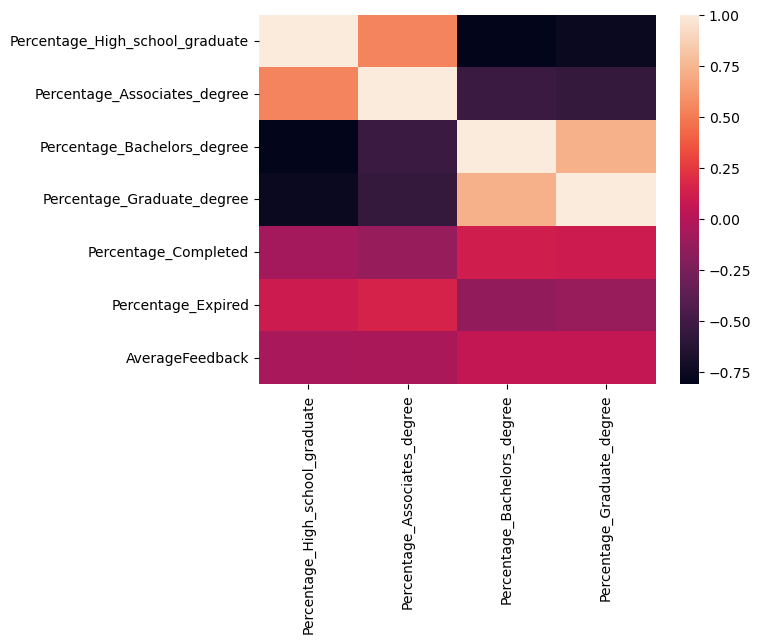

                                 Percentage_High_school_graduate  \
Percentage_High_school_graduate                         1.000000   
Percentage_Associates_degree                            0.534399   
Percentage_Bachelors_degree                            -0.810265   
Percentage_Graduate_degree                             -0.754667   
Percentage_Completed                                   -0.078073   
Percentage_Expired                                      0.098810   
AverageFeedback                                        -0.057155   

                                 Percentage_Associates_degree  \
Percentage_High_school_graduate                      0.534399   
Percentage_Associates_degree                         1.000000   
Percentage_Bachelors_degree                         -0.533913   
Percentage_Graduate_degree                          -0.556325   
Percentage_Completed                                -0.130680   
Percentage_Expired                                   0.144671   


In [2]:

%%pyspark
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
numeric_data = Education_df.select_dtypes(include=['float', 'int'])
correlation_matrix = numeric_data.corr()
correlation = correlation_matrix[['Percentage_High_school_graduate', 'Percentage_Associates_degree', 'Percentage_Bachelors_degree', 'Percentage_Graduate_degree']]
hm = sn.heatmap(data=correlation)
plt.show()


print(correlation)

please upload to lakehouse

please upload to lakehouse

In [1]:
select * 
from bizdatabreakdowns
where zip = 10016

StatementMeta(, 0d5da79d-ce73-45e4-95d8-6237fbf8aa77, 2, Finished, Available, Finished)

<Spark SQL result set with 9 rows and 15 fields>